In [4]:
pip install opencv-python


In [3]:
print("hi")

hi


In [5]:
import cv2
print(cv2.__version__)

4.10.0


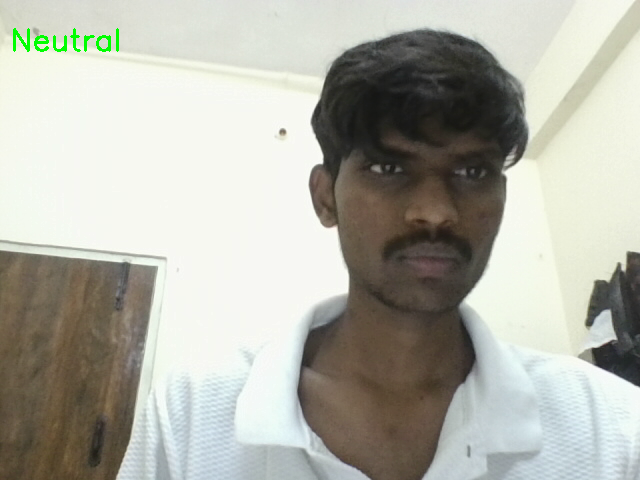

Video stream stopped.


In [3]:
import cv2
import numpy as np
import tensorflow as tf
from IPython.display import display, clear_output
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model("emotion_detection_xception.keras")

# Emotion labels based on the FER2013 dataset
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize webcam
cap = cv2.VideoCapture(0)

try:
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to grayscale and resize to 48x48
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized_frame = cv2.resize(gray_frame, (48, 48))
        normalized_frame = resized_frame.astype('float32') / 255.0
        reshaped_frame = np.expand_dims(normalized_frame, axis=[0, -1])  # Shape (1, 48, 48, 1)

        # Predict emotion
        predictions = model.predict(reshaped_frame, verbose=0)
        emotion_index = np.argmax(predictions)
        emotion = emotion_labels[emotion_index]

        # Display emotion on the frame
        cv2.putText(frame, emotion, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Convert the frame to RGB format for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(frame_rgb)

        # Display the frame in the notebook
        clear_output(wait=True)  # Clear previous frame
        display(pil_img)

        # Exit the loop by pressing 'q' (handled as part of the kernel interruption)
except KeyboardInterrupt:
    # Gracefully handle interruption (e.g., pressing stop in Jupyter Notebook)
    print("Video stream stopped.")
finally:
    # Release resources
    cap.release()


In [1]:
import cv2
import numpy as np
from IPython.display import display, clear_output
from PIL import Image
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="emotion_detection_xception.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Emotion labels based on the FER2013 dataset
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize webcam
cap = cv2.VideoCapture(0)

try:
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to grayscale and resize to 48x48
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized_frame = cv2.resize(gray_frame, (48, 48))
        normalized_frame = resized_frame.astype('float32') / 255.0
        reshaped_frame = np.expand_dims(normalized_frame, axis=[0, -1])  # Shape (1, 48, 48, 1)

        # Set input tensor
        interpreter.set_tensor(input_details[0]['index'], reshaped_frame)

        # Run inference
        interpreter.invoke()

        # Get the prediction
        predictions = interpreter.get_tensor(output_details[0]['index'])
        emotion_index = np.argmax(predictions)
        emotion = emotion_labels[emotion_index]

        # Display emotion on the frame
        cv2.putText(frame, emotion, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Convert the frame to RGB format for display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(frame_rgb)

        # Display the frame in the notebook
        clear_output(wait=True)  # Clear previous frame
        display(pil_img)

except KeyboardInterrupt:
    # Gracefully handle interruption (e.g., pressing stop in Jupyter Notebook)
    print("Video stream stopped.")
finally:
    # Release resources
    cap.release()


Video stream stopped.


In [ ]:
angry , surprisse , sad , neutral 